# 课堂示例代码复刻

## 数据准备

In [20]:
import pandas as pd # 数据表
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [21]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [22]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 词向量模型

词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

In [23]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [24]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [25]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [26]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.74462456  0.93876547  0.4937601  -0.18387231 -0.3480233  -2.3336904
  0.778912    2.9142947  -1.1405152  -1.2399234  -0.5523671  -2.0261958
 -0.30431145  1.3287325   0.59421295 -0.487687    0.4954929  -0.5412401
 -0.23345049 -2.1085885   1.126323   -0.0873929   0.6409923  -0.8779922
 -0.02472234  0.34612185 -0.39540958 -0.7672946  -1.0069492  -0.1124535
  1.1067009   0.57817584  0.3829819  -0.74511135 -0.6944869   1.7209821
  0.5382937  -0.9552799  -1.0536513  -2.2226117   0.08934433 -0.7060522
 -0.1573987  -0.918585    1.1505342  -0.6703156  -1.4786782   0.49558258
  1.285776    0.71627057  0.41951278 -0.47628793 -0.7223241  -0.13822012
 -0.57716846  1.1211249   0.16455972  0.18534157 -0.543781    0.4433701
  0.23619142  0.462736   -0.5639101   0.7312487  -0.6895634   1.4201918
  0.09254329  0.86431557 -1.3680251   1.8126732  -0.78080094  1.1253226
  0.710231   -0.09223791  1.7378751   0.38716823  0.04442593 -0.34627467
 -0.48817033  0.5071044  -0.69130343  0.3078756  -1.054978

In [27]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.702444
0.69125044
0.6386499
0.99658656
0.9921176
0.9931539


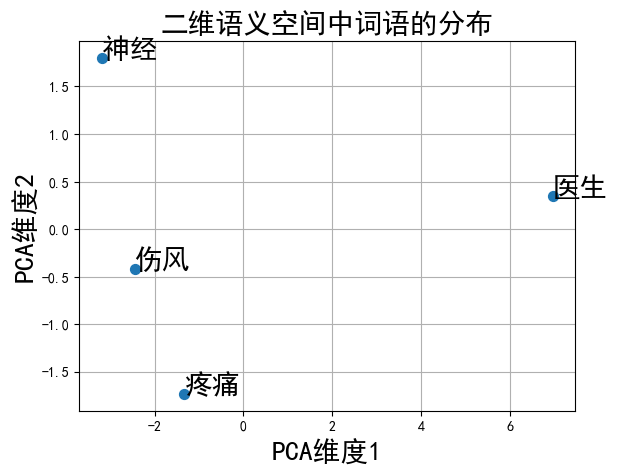

In [28]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [29]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78746.4609375
Loss after epoch 1: 69587.0859375
Loss after epoch 2: 73211.359375
Loss after epoch 3: 62405.9375
Loss after epoch 4: 55264.5
Loss after epoch 5: 51715.78125
Loss after epoch 6: 49539.09375
Loss after epoch 7: 42498.4375
Loss after epoch 8: 41126.15625
Loss after epoch 9: 45321.1875
Loss after epoch 10: 43397.3125
Loss after epoch 11: 36738.625
Loss after epoch 12: 36528.0
Loss after epoch 13: 35490.0625
Loss after epoch 14: 34438.0
Loss after epoch 15: 32651.8125
Loss after epoch 16: 36262.9375
Loss after epoch 17: 35331.875
Loss after epoch 18: 34308.0
Loss after epoch 19: 30080.3125
Loss after epoch 20: 32603.125
Loss after epoch 21: 31758.0
Loss after epoch 22: 31051.9375
Loss after epoch 23: 30310.625
Loss after epoch 24: 29341.0
Loss after epoch 25: 26012.25
Loss after epoch 26: 28202.625
Loss after epoch 27: 24089.25
Loss after epoch 28: 27117.875
Loss after epoch 29: 23913.625
Loss after epoch 30: 22596.375
Loss after epoch 31: 23287.0
Loss aft

# 自我收集数据探索

## 数据准备

In [30]:
import pandas as pd # 数据表
df = pd.read_excel('#ChatGPT#.xlsx', index_col = 0)
df

,mid,uid,content,retweets,comments,star,time
序号,,,,,,,
1,4995637260851024,3171256063,"【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说：""如果我是Me...",142,80,1737,01月29日 21:50
2,5004272983084403,6444741184,从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...,109,14,221,02月22日 17:45
3,4997285800837908,3171256063,【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...,22,13,181,02月03日 11:00
4,4994965230848942,6182606334,另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...,105,2,87,01月28日 01:19
5,4994859628232994,6182606334,昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...,78,5,105,01月27日 18:19
...,...,...,...,...,...,...,...
377,4915189370067157,1875034341,孙正义：\n#一场巨大革命即将到来#\n，\n#软银终将“统治世界”#\n#chatgpt#...,26,评论,23,2023年06月21日 21:58
378,4886500251013259,7755110011,今天要码的东西不少，一件件说吧。\n还是先从老美开始，OPEC+宣布每天削减生产100万桶原...,2,7,47,2023年04月03日 17:58
379,4922672675555676,6105753431,【用\n#ChatGPT#\n做游戏】\n用ChatGPT最新推出的代码解释器，5分钟就能做...,26,5,21,2023年07月12日 13:34


In [31]:
# 分词
import jieba # 中文分词
import pandas as pd
import re

# 定义中文标点符号列表  
chinese_punctuation = '()：（）\@《》＜＞，#“”【】'  
  
# 定义预处理函数  
def preprocess_text(text):  
    # 去除标点符号  
    text = re.sub(f'[{re.escape(chinese_punctuation)}]+', '', text)  
      
    # 去除数字  
    text = re.sub(r'\d+', '', text)  
      
    # 去除指定文字  
    stopwords = ['\n','的','了']  
    for word in stopwords:  
        text = text.replace(word, '')  
      
    # 返回预处理后的文本  
    return text.strip()  
  
# 定义分词函数  
def tokenize_text(text):  
    # 使用jieba进行分词  
    words = jieba.lcut(text)  
    return words  
  
# 对df['标题']列中的每个文本进行预处理和分词  
tokenized_texts = [tokenize_text(preprocess_text(text)) for text in df['content']]  
  
# 将分词结果转换为字符串，用空格分隔  
tokenized_texts_str = [' '.join(tokens) for tokens in tokenized_texts]  
  
# 将分词后的文本列表添加到df中作为新列  
df['内容文本分词'] = tokenized_texts_str  
  
# 打印前几行结果查看  
print(df[['content', '内容文本分词']].head())

                                              content  \
序号                                                      
1   【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说："如果我是Me...   
2   从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...   
3   【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...   
4   另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...   
5   昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...   

                                               内容文本分词  
序号                                                     
1   🔥 ChatGPT 为 Megan 想 一个 全套 应对 方案 ChatGPT 说 " 如果...  
2   从零开始 学习 大 语言 模型 一做 一期 大 语言 模型 教程 不要 也 不要 关注 免费...  
3   ChatGPT 辣评 🌶 认为 文科 没用 人 可能 正是 因为 缺乏 文科 教育 才 看不...  
4   另 一个 GPTs 调用 能力 牛批 演示 在 一个 聊天 中先 使用 Grimoire 构...  
5   昨晚 ChatGPT 推出 通过 在 正常 聊天 中   其他 GPTs 协同 处理 任务 ...  


In [32]:
df

,mid,uid,content,retweets,comments,star,time,内容文本分词
序号,,,,,,,,
1,4995637260851024,3171256063,"【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说：""如果我是Me...",142,80,1737,01月29日 21:50,"🔥 ChatGPT 为 Megan 想 一个 全套 应对 方案 ChatGPT 说 "" 如果..."
2,5004272983084403,6444741184,从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...,109,14,221,02月22日 17:45,从零开始 学习 大 语言 模型 一做 一期 大 语言 模型 教程 不要 也 不要 关注 免费...
3,4997285800837908,3171256063,【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...,22,13,181,02月03日 11:00,ChatGPT 辣评 🌶 认为 文科 没用 人 可能 正是 因为 缺乏 文科 教育 才 看不...
4,4994965230848942,6182606334,另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...,105,2,87,01月28日 01:19,另 一个 GPTs 调用 能力 牛批 演示 在 一个 聊天 中先 使用 Grimoire 构...
5,4994859628232994,6182606334,昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...,78,5,105,01月27日 18:19,昨晚 ChatGPT 推出 通过 在 正常 聊天 中 其他 GPTs 协同 处理 任务 ...
...,...,...,...,...,...,...,...,...
377,4915189370067157,1875034341,孙正义：\n#一场巨大革命即将到来#\n，\n#软银终将“统治世界”#\n#chatgpt#...,26,评论,23,2023年06月21日 21:58,孙正义 一场 巨大 革命 即将 到来 软银 终将 统治 世界 chatgpt 自从 去年 月...
378,4886500251013259,7755110011,今天要码的东西不少，一件件说吧。\n还是先从老美开始，OPEC+宣布每天削减生产100万桶原...,2,7,47,2023年04月03日 17:58,今天 要码 东西 不少 一件件 说 吧 。 还是 先 从 老美 开始 OPEC + 宣布 每...
379,4922672675555676,6105753431,【用\n#ChatGPT#\n做游戏】\n用ChatGPT最新推出的代码解释器，5分钟就能做...,26,5,21,2023年07月12日 13:34,用 ChatGPT 做 游戏 用 ChatGPT 最新 推出 代码 解释器 分钟 就 能 做...


## 词向量模型

In [33]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [34]:
corpus = df['内容文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['🔥', 'ChatGPT', '为', 'Megan', '想', '一个', '全套', '应对', '方案', 'ChatGPT', '说', '"', '如果', '我', '是', 'Megan', '面对', 'Nicki', '这波', '热辣', '攻势', '我', '得来', '点', '既', '机智', '又', '有趣', '回应', '不能', '让', '这场', '较量', '变成', '单调', '对峙', '。', '🌪', '️', '🎤', '.', '发行', '反击', '单曲', '我会', '制作', '一首', '反击', '单曲', '不仅', '歌词', '要', '机智', '有力', '而且', '风格', '上要', '和', 'Nicki', '截然不同', '展现', '我', '独特', '魅力', '。', '可能', '会', '给', '这', '首歌', '起个', '讽刺', '名字', '比如', 'Big', 'Heart', '或者', 'Not', 'Just', 'a', 'Foot', '。', '.', '推特', '对决', '在', 'Twitter', '上', '发起', '一场', '战争', '用', '幽默', '和', '智慧', '回击', 'Nicki', '言论', '。', '比如', '回复', '说', '听', 'NickiBig', 'Foot', '我', '决定', '去', '做', '个', '足底', '按摩', '感谢', '她', '提醒', '我', '照顾', '好', '自己', '！', '👣', '💆', '\u200d', '♀', '️', 'SelfCare', '.', '制作', '搞笑', '视频', '在', 'TikTok', '或', 'Instagram', '上', '发布', '一段', '搞笑', '视频', '模仿', 'Nicki', '风格', '但用', '夸张', '手法', '来', '表现', '向', '大家', '展示', '即使', '在', '争执', '中', '我', '也', '能', '保持', '轻松', '和', '幽默', '心态', '。', '.', '慈

In [35]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 40
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [36]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

。: [-0.09347133  0.99385476  0.4603569   0.38940626 -0.65035367 -0.89230466
 -0.24645306  1.2197117  -0.0409884  -0.00396246  0.30839637 -0.4007312
 -0.61938643 -0.30317518  0.05649913  0.34378508  0.48327076 -0.6310681
 -0.17977598 -0.25150588  0.32828718 -0.07336108  0.81918406 -0.04651155
  0.5448192  -0.74284613 -0.6754048   0.606412   -0.7998861   0.7395281
 -0.15237741 -0.01662783  1.0019051  -0.74120986 -0.40412244  0.3780675
  0.5336715  -0.518448   -0.41467944 -0.08092706 -0.43464696 -0.39969066
 -0.45514753 -0.03304212  0.6427958  -0.03458203 -0.97654325  0.66483796
 -0.38578206  0.88939446  0.33917978  0.19928889 -0.48773572 -0.29328236
  0.20956421 -0.696086    0.48291555  0.4382368  -0.92387205  0.13179934
 -0.12338047 -0.2104754  -0.5429887  -0.6670963   0.3925114  -0.19225654
  0.6674961   0.05028414 -0.52365035  0.7611248  -0.9812182   0.08214971
 -0.2342591  -1.2811565   0.6865927  -0.0976219  -0.53899086  0.30140153
  0.05858295 -0.4361663  -0.3051681  -0.11038325  0.

In [37]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('ChatGPT', '情感'))
print(model.wv.similarity('ChatGPT', '聊天'))
print(model.wv.similarity('ChatGPT', '教育'))
print(model.wv.similarity('ChatGPT', '文科'))
print(model.wv.similarity('人工智能', '情感'))
print(model.wv.similarity('聊天', '理解'))

0.07275997
0.6136285
0.13453457
0.14992468
0.13951845
0.23064569


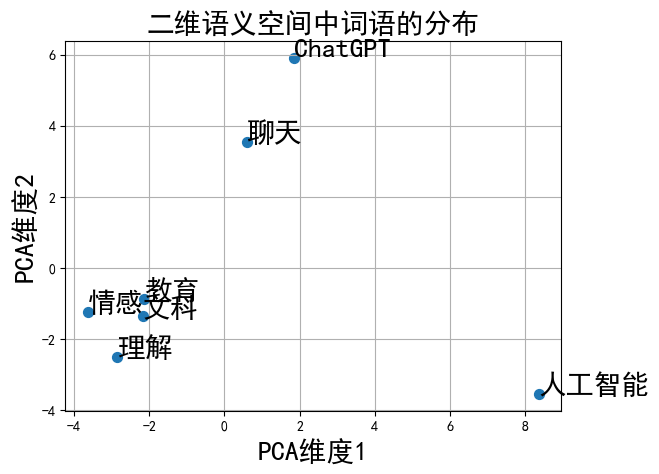

In [38]:
# 可视化

words = ['ChatGPT', '情感', '聊天', '教育','文科','人工智能','理解']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

## 总结
我们可以大致看到“ChatGPT”和“聊天”的距离比较近，和“情感”、“教育”、“理解”、“文科”的距离较远，这说明目前ChatGPT还不能够满足情感和教育的需求，不能够真正理解文本内涵，和我人文学科内容相差较大，这是符合目前对于ChatGPT的常规认知的。但我们也可以看到ChatGPT离人工智能的距离也相对较远，说明并不能简单地把ChatGPT和人工智能划等号。
“情感”、“教育”、“理解”和“文科”的距离是比较近的，这进一步说明教育、文科和情感、理解是紧密相连的。
综上所述，通过词向量模型的分析，我们更直观地看到了目前微博用户对于ChatGPT的一定认识。